In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

*Simple Statistics of the dataset*

In [5]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
#To check whether there are null values in the dataset
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [9]:
df['ID'] = range(0, 0+len(df))

In [10]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,ID
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,2
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,3
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4


Analysis of the dataset

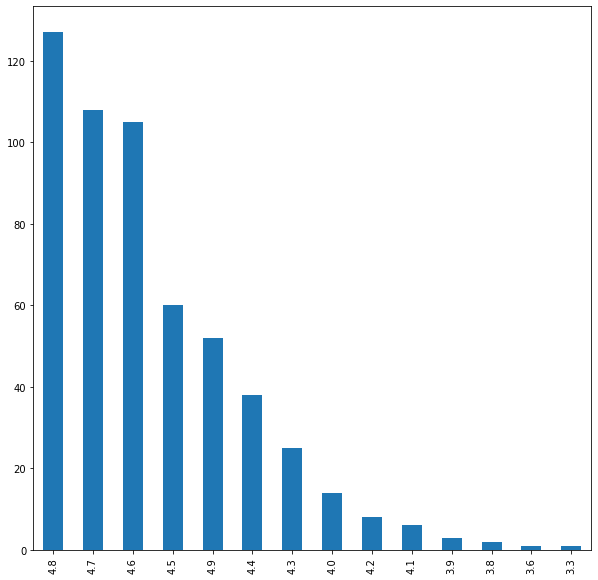

In [11]:
#To visualize the commonality of the ratings on a bar chart
df['User Rating'].value_counts().plot(kind='bar',figsize=(10,10))

From the above visualisation,we can see books rated highest i.e 4.8 in this case have a higher count as compared to those lowly rated (in this case 3.3).Making it is possible to conclude books that are rated higher are read more due to their popularity.

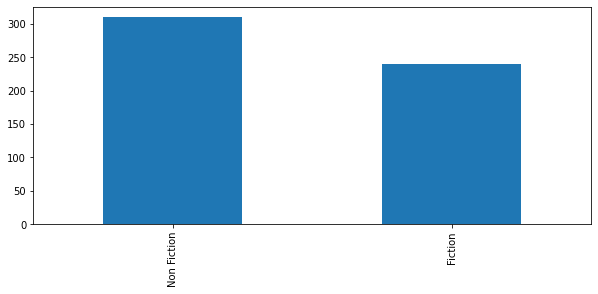

In [14]:
#a visualization of categorization of books whether they fall into either fiction or non-fiction
df['Genre'].value_counts().plot(kind='bar',figsize=(10,4))

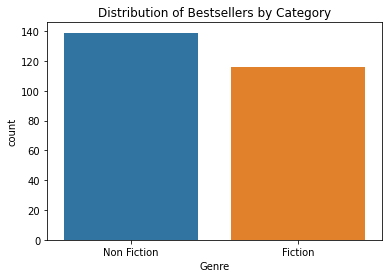

In [63]:
sns.countplot(x='Genre', data=df)
plt.title('Distribution of Bestsellers by Category')
plt.show()

In [16]:
df['User Rating'].unique()

array([4.7, 4.6, 4.8, 4.4, 4.5, 3.9, 4.3, 4.2, 4.9, 3.8, 3.6, 4. , 4.1,
       3.3])

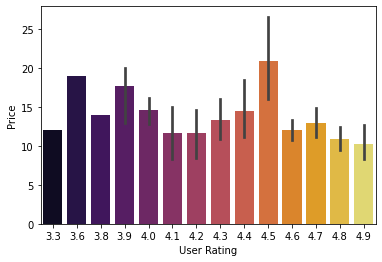

In [18]:
fig = plt.Figure(figsize=(15,9))
sns.barplot(x ='User Rating',y='Price',data=df,palette = 'inferno')

In [19]:
#To check the most expensive book in the dataset 
df['Price'].max()

105

In [20]:
df['Reviews'].max()

87841

Multivariate analysis to look into the relationship between variable

In [21]:
df.corr()

,User Rating,Reviews,Price,Year,ID
User Rating,1.000000,-0.001729,-0.133086,0.242383,0.021505
Reviews,-0.001729,1.000000,-0.109182,0.263560,0.076570
Price,-0.133086,-0.109182,1.000000,-0.153979,0.041603
Year,0.242383,0.263560,-0.153979,1.000000,-0.041211
ID,0.021505,0.076570,0.041603,-0.041211,1.000000


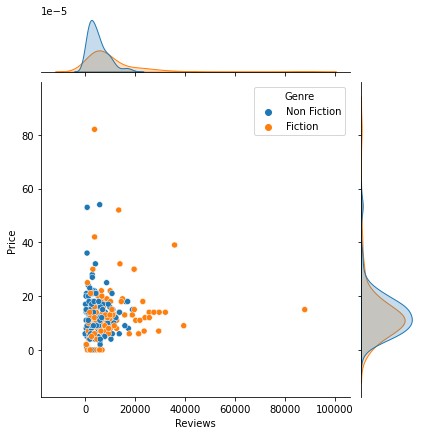

In [55]:
# To check the relationship between price and reviews

# Product attributes

sns.jointplot(y="Price",x="Reviews",hue="Genre",data = df)


There are more reviews for fiction than non-fiction

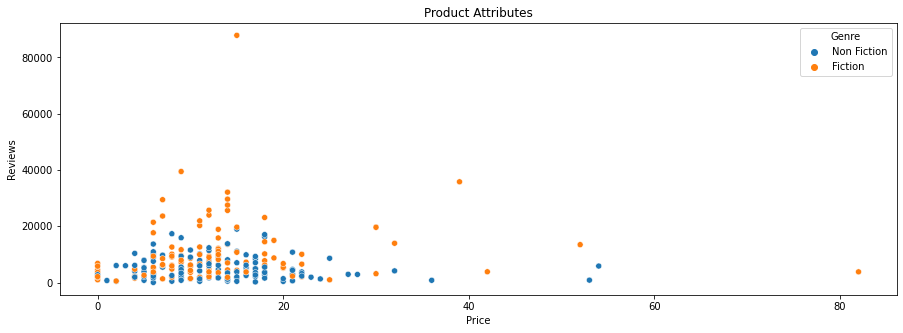

In [61]:
#pricing analysis
plt.figure(figsize=(15,5))
sns.scatterplot(x='Price', y='Reviews', hue = 'Genre' ,data=df)
plt.title('Product Attributes')
plt.show()

In [23]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

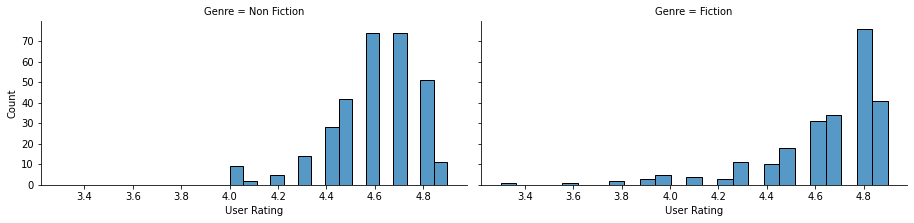

In [24]:
h = sns.FacetGrid(df, col="Genre", height=3.2, aspect=2)
h.map(sns.histplot, "User Rating")

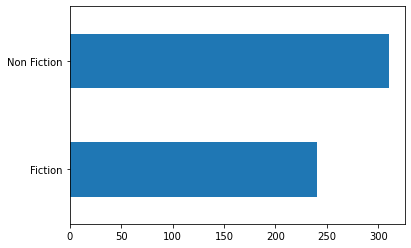

In [25]:
df['Genre'].value_counts().sort_values().plot(kind='barh')

Non-fiction books sell out more than fiction books

Text(0.5, 1.0, 'Average Rating distription for all books')

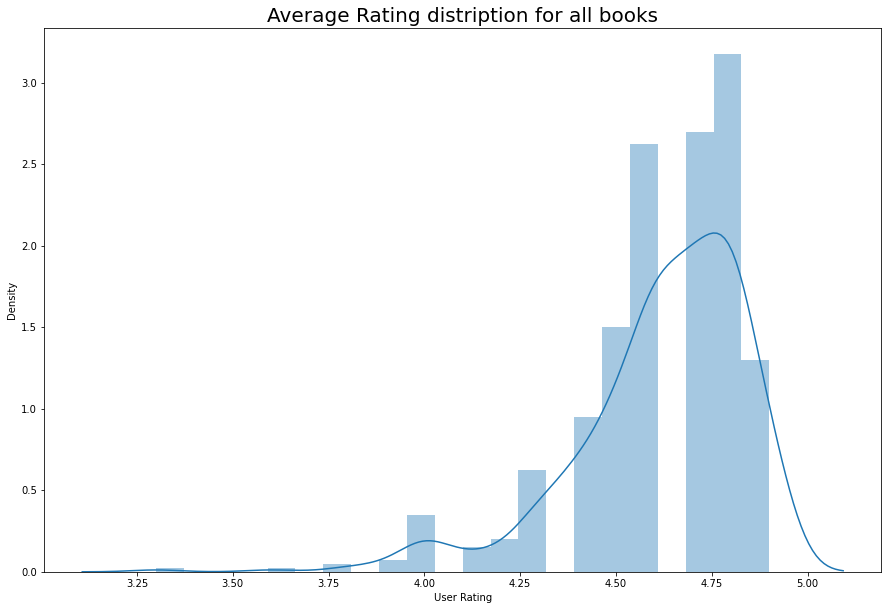

In [26]:
fig,ax = plt.subplots(figsize=(15,10))
sns.distplot(df['User Rating'],ax=ax)
ax.set_title('Average Rating distription for all books',fontsize=20)

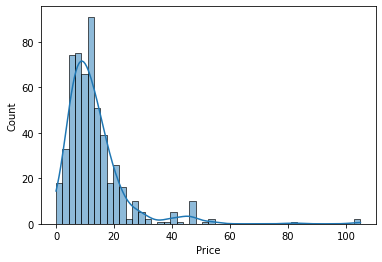

In [27]:
sns.histplot(data = df,x = 'Price',kde = 'True')

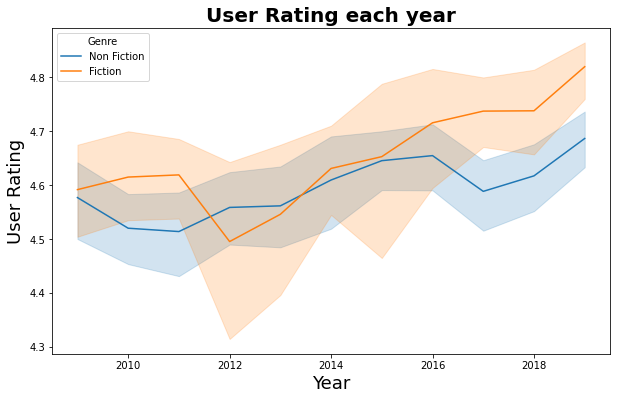

In [28]:
plt.figure(figsize= (10,6))
sns.lineplot(x= "Year", y="User Rating", data=df, hue="Genre")
plt.title("User Rating each year", fontdict={"fontweight":"bold", "fontsize":20})
plt.xlabel("Year", fontdict={"fontsize":18})
plt.ylabel("User Rating", fontdict={"fontsize":18})
plt.show()

From the above visualisation we can conclude that there are more reviews for fiction than non-fiction with the exception being early 2012

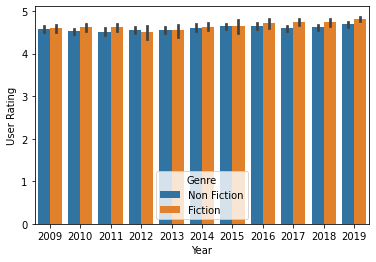

In [29]:
sns.barplot( data=df, x = "Year", y="User Rating", hue="Genre")

Fiction books received more reviews overall as compared to non_fiction books

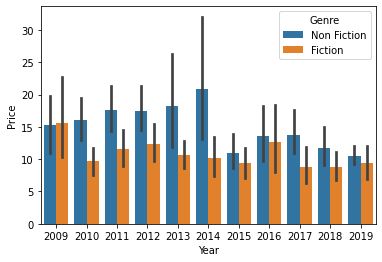

In [30]:
sns.barplot( data=df, x = "Year", y="Price", hue="Genre")

Non-fiction books are more expensive on average throughout the entire timeframe compared to fiction with the exception of 2009

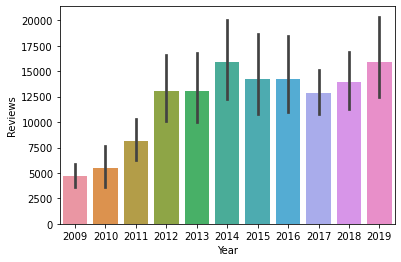

In [31]:
sns.barplot(y = 'Reviews',x = 'Year', data = df)

There have been an increase in reviews over time

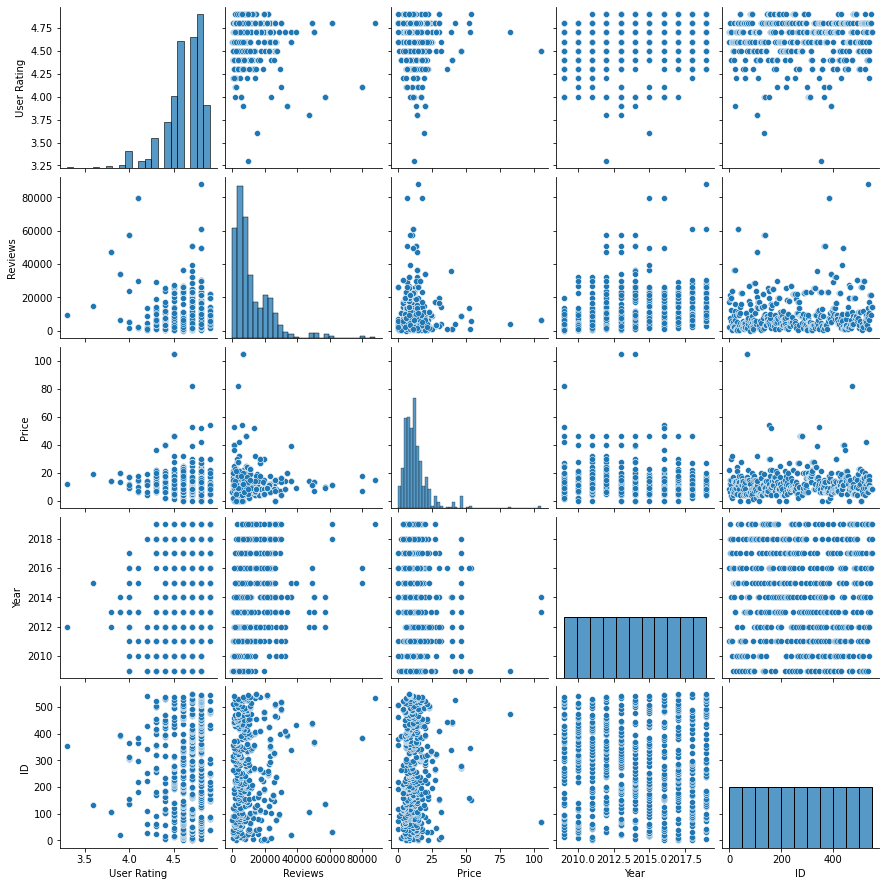

In [32]:
#to check distribution and relationship between variables
sns.pairplot(df)

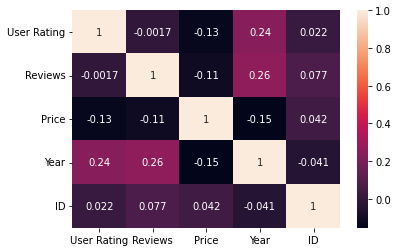

In [33]:
sns.heatmap(df.corr(),annot = True)
     

CONCLUSION



* Non-fiction books are more expensive on average throughout the entire 

* There are more books in the non-fiction genre than there are in the fiction 
genre
*  There is a overall higher user rating in books in the fiction genre than in the non-fiction genre
*  Non-fiction books are more expensive on average throughout the entire timeframe compared to fiction with the exception of 2009.
*  There have been an overall increase in reviews over time
*  Year has a positive though very low correlation with both User Rating and Reviews

In [34]:
# Preprocess data
# Remove duplicates
df.drop_duplicates(subset=['Name'], keep=False, inplace=True)

In [35]:
df.info


<bound method DataFrame.info of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
536  Whose Boat Is This Boat?: Comments That Don't ...   
537  Wild: From Lost to Found on the Pacific Crest ...   
538  Winter of the World: Book Two of the Century T...   
539  Women Food and God: An Unexpected Path to Almo...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   

                               Author  User Rating  Reviews  Price  Year  \
0                            JJ Smith          4.7    17350      8  2016   
1                        Stephen King          4.6     2052     22  2011   
2                  Jordan B. Peterson      

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
# Create a new column that combines the book title, author name, and genre
df['content'] = df['Name'] + ' ' + df['Author'] + ' ' + df['Genre']

In [38]:
# Create a count matrix using the combined data
count_matrix = CountVectorizer().fit_transform(df['content'])

In [39]:
# Compute the cosine similarity matrix based on the count matrix
cosine_sim = cosine_similarity(count_matrix)

In [40]:
# Define a function to get recommendations
def recommend_book(title, cosine_sim=cosine_sim, df=df):
    # Get the index of the book that matches the title
    index = df[df['Name'] == title].index[0]

    # Get the similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the indices of the most similar books
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return df['Name'].iloc[book_indices]


In [41]:
df.loc[3]

Name                                 1984 (Signet Classics)
Author                                        George Orwell
User Rating                                             4.7
Reviews                                               21424
Price                                                     6
Year                                                   2017
Genre                                               Fiction
ID                                                        3
content        1984 (Signet Classics) George Orwell Fiction
Name: 3, dtype: object

In [42]:
df.loc[17]

Name              Adult Coloring Book: Stress Relieving Patterns
Author                                        Blue Star Coloring
User Rating                                                  4.4
Reviews                                                     2951
Price                                                          6
Year                                                        2015
Genre                                                Non Fiction
ID                                                            17
content        Adult Coloring Book: Stress Relieving Patterns...
Name: 17, dtype: object

In [43]:
# Define a function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim, df=df):
    # Get the index of the book that matches the title
    index = df[df['Name'] == title].index[0]

    # Get the similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the indices of the most similar books
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return df['Name'].iloc[book_indices]



In [44]:
# Test the function with a sample book title
get_recommendations('1984 (Signet Classics)')

67                                       Decision Points
121                      George Washington's Sacred Fire
5          A Dance with Dragons (A Song of Ice and Fire)
22                                             Allegiant
182                                              Inferno
524                                             Watchmen
122    George Washington's Secret Six: The Spy Ring T...
77                                 Divergent / Insurgent
96                                    Eclipse (Twilight)
104                                  Fifty Shades Darker
Name: Name, dtype: object

In [45]:
get_recommendations('Adult Coloring Book: Stress Relieving Patterns')

151      Hamilton: The Revolution
150                          Guts
217                          Life
67                Decision Points
339                   The Amateur
12        A Stolen Life: A Memoir
37                    Born to Run
158    Harry Potter Coloring Book
214             Leonardo da Vinci
417              The Last Lecture
Name: Name, dtype: object